# Homework 1: U.S. Boundary Currents

Name: Lauren Bayne

Date: 08/22/2025

#### Overview
In class, we examined the general structure of ocean circulation on large scales and saw that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [106]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc4

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [107]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_evel=xr.open_dataset('EVEL_2015_12.nc')
ds_nvel=xr.open_dataset('NVEL_2015_12.nc')

# into numpy arrays
evel=np.array(ds_evel['EVEL'])
nvel=np.array(ds_nvel['NVEL'])
ds_evel

<xarray.Dataset> Size: 104MB
Dimensions:    (time: 1, k: 50, j: 360, i: 720, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    EVEL       (time, k, j, i) float64 104MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Tue Aug 27 17:25:43 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [108]:
# store the velocity components and longitude/latitude data
# into numpy arrays
longitude=np.array(ds_evel['longitude'])
latitude=np.array(ds_evel['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

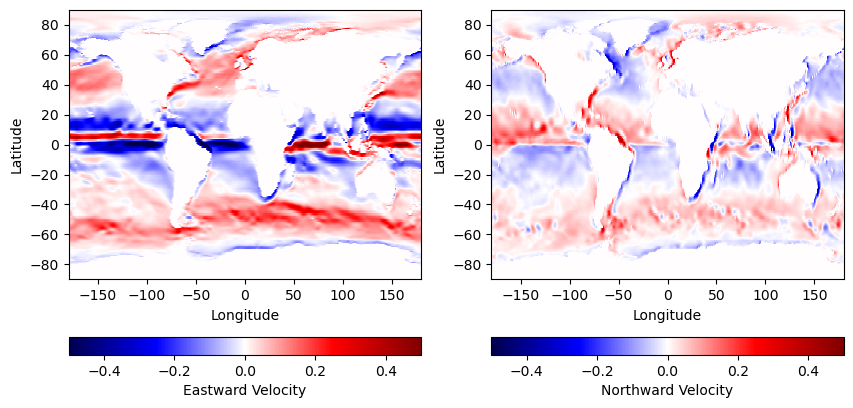

In [109]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
plt.pcolormesh(longitude, latitude, evel[0,0,:,:], vmin=-0.5, vmax=0.5, cmap='seismic')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Eastward Velocity', orientation='horizontal')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
plt.pcolormesh(longitude, latitude, nvel[0,0,:,:], vmin=-0.5, vmax=0.5, cmap='seismic')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Northward Velocity', orientation='horizontal')
plt.show()


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast? Northeast and south.
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast? East and northeast.


2. Which current flows faster? East coast or west coast? East coast.
    
3. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

    These currents make sense because along the west coast the North Pacific the gyre rotates clockwise, so at 30 degrees the current is to the south and at 40 degrees the current is mostly eastward. In the Atlantic the clockwise rotation is along the eastern coast, so the current is moving north along the coastline and following it northeast. This current is stronger due to the smaller gyre and other topography.  

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [110]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta=xr.open_dataset('THETA_2015_12.nc')

In [111]:
# store the THETA grid into a into numpy array
theta=np.array(ds_theta['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

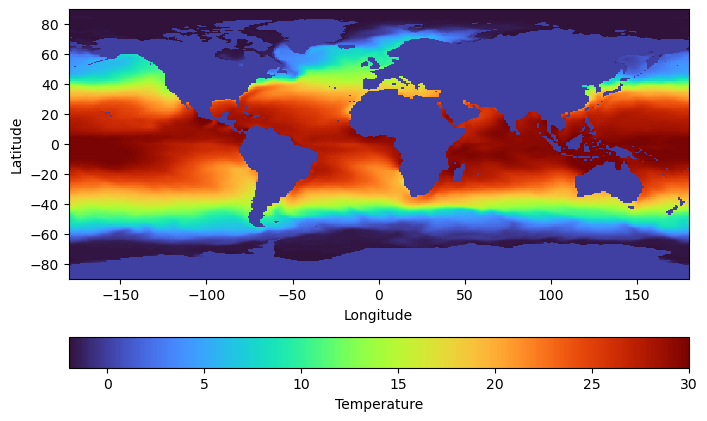

In [112]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
plt.pcolormesh(longitude, latitude, theta[0,0,:,:], vmin=-2, vmax=30, cmap='turbo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Temperature', orientation='horizontal')
plt.show()


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?


   At 30 degrees north, the west coast temperature is around 13 degrees celsius and the east coast temperature is around 25 degrees celcius.
   
3. How might ocean currents contribute to this temperature regime?


   The west coast gyre is bringing cold waters from the north along the coast southward, and on the east coast the gyre current is bringing warm water from the equator along the coast northward.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [113]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvelstar=xr.open_dataset('WVELSTAR_2015_12.nc')
ds_wvelstar

<xarray.Dataset> Size: 104MB
Dimensions:    (time: 1, k_l: 50, j: 360, i: 720, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    timestep   (time) int64 8B ...
    Zl         (k_l) float32 200B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    WVELSTAR   (time, k_l, j, i) float64 104MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      0.0
    date_created:                 Tue Aug 27 18:20:19 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [114]:
# store the WVELSTAR grid into a into numpy array
wvelstar=np.array(ds_wvelstar['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [115]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?

In [116]:
#depth is Z and in this specific dataset it is "Zl" in meters down
Z=np.array(ds_wvelstar['Zl'])

# trying to figure out best vertical velocity vmin and vmax
print(np.nanmin(wvelstar[0, :, 259, :]), np.nanmax(wvelstar[0, :, 259, :]))

-3.2632233342155814e-05 2.875943755498156e-05


Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

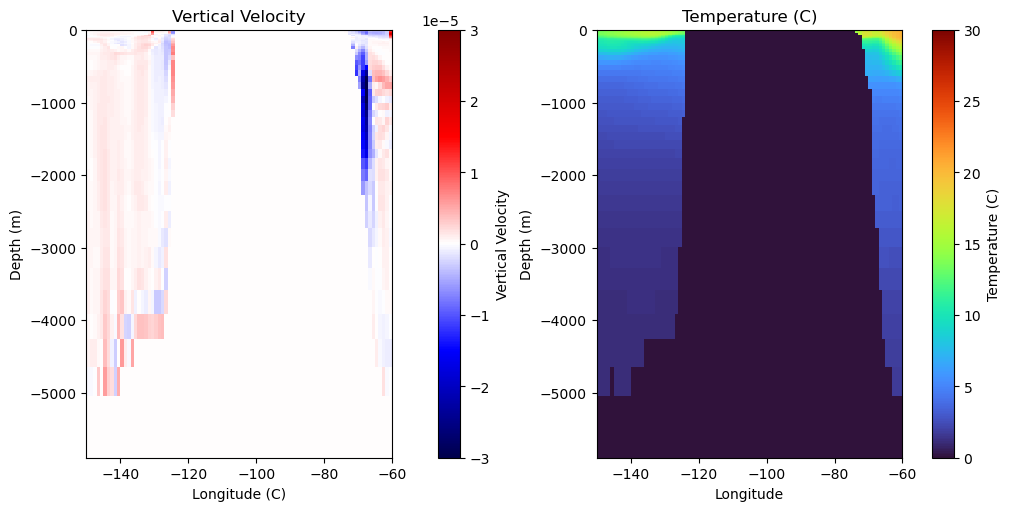

In [117]:
# make a figure
fig = plt.figure(figsize=(10,5), constrained_layout=True)

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(1,2,1)
velocity = plt.pcolormesh(longitude, Z, wvelstar[0, :, 259, :], vmin=-3e-5, vmax=3e-5, cmap='seismic', shading='auto')
plt.colorbar(velocity, label='Vertical Velocity' )
plt.title('Vertical Velocity')
plt.ylabel('Depth (m)')
plt.xlabel('Longitude (C)')
plt.xlim(-150, -60) #zooming in to look at west and east coast better

# make a subplot of the vertical profile of temperature
plt.subplot(1,2,2)
temperature = plt.pcolormesh(longitude, Z, theta[0, :, 259, :], vmin=0, vmax=30, cmap='turbo', shading='auto')
plt.colorbar(temperature, label='Temperature (C)' )
plt.title('Temperature (C)')
plt.ylabel('Depth (m)')
plt.xlabel('Longitude')
plt.xlim(-150, -60) 

plt.show()

### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1. The vertical velocity on the west coast is positive so there is upwelling and on the east coast it is negative so there is down welling. This makes sense with the winds and currents along the coast line and the coriolis effect driving water offshore on the west coast and onshore on the east coast.
2. The speed of vertical velocity is controled by large scale water movement effected by coriolis effetcs and coastlines and large ocean current patterns pulling water up or down. The horizontal velocities are much faster because they are controlled by winds and currents on smaller scales.
3. The vertical currents along coastlines bring cold water up from depth (upwelling) and decrease the sea surface temperature on the west coast and downwelling on the east coast pulls warm water towards the coast, maintaing warm sea surface temperatures.
4. The wind is to the south and defelcted to the righ so offshore driving water offshore and upwelling the cold deeper water near the coast.